# Project: Investigate the tmdb-movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [155]:
df = pd.read_csv('tmdb-movies.csv')
pd.set_option("display.max_columns", None) #a method to show all column names in the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [156]:
df.shape

(10866, 21)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [158]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (to get number of columns of interest and also fix the Nan values and zero values

> we will drop the un needed columns which are not interesting

In [159]:
df.drop(['id','imdb_id','popularity','homepage','tagline','keywords','overview','runtime','release_date','budget','revenue'],axis=1,inplace=True)

In [160]:
df.head(2) #to check the existing column names

,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   cast                  10790 non-null  object 
 2   director              10822 non-null  object 
 3   genres                10843 non-null  object 
 4   production_companies  9836 non-null   object 
 5   vote_count            10866 non-null  int64  
 6   vote_average          10866 non-null  float64
 7   release_year          10866 non-null  int64  
 8   budget_adj            10866 non-null  float64
 9   revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 849.0+ KB


In [162]:
df.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> we can notice from the above quick statics that almost more than half of the movies have zero budget and zero revenue which mean that we have missing values

> so we will replace zero values with the mean of the data so as not to loose too much data and  drop all null values in the dataset

In [163]:
df['budget_adj'].replace(0,df['budget_adj'].mean(),inplace=True)
df['revenue_adj'].replace(0,df['revenue_adj'].mean(),inplace=True)

In [164]:
df.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   cast                  10790 non-null  object 
 2   director              10822 non-null  object 
 3   genres                10843 non-null  object 
 4   production_companies  9836 non-null   object 
 5   vote_count            10866 non-null  int64  
 6   vote_average          10866 non-null  float64
 7   release_year          10866 non-null  int64  
 8   budget_adj            10866 non-null  float64
 9   revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 849.0+ KB


In [166]:
df.dropna(inplace=True) #drop Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        9773 non-null   object 
 1   cast                  9773 non-null   object 
 2   director              9773 non-null   object 
 3   genres                9773 non-null   object 
 4   production_companies  9773 non-null   object 
 5   vote_count            9773 non-null   int64  
 6   vote_average          9773 non-null   float64
 7   release_year          9773 non-null   int64  
 8   budget_adj            9773 non-null   float64
 9   revenue_adj           9773 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 839.9+ KB


In [167]:
df.duplicated(subset=['original_title']).sum() #check number of duplicated movies titles

261

In [168]:
df.drop_duplicates(subset=['original_title'],keep='first',inplace=True) #drop duplicated movies titles values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9512 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        9512 non-null   object 
 1   cast                  9512 non-null   object 
 2   director              9512 non-null   object 
 3   genres                9512 non-null   object 
 4   production_companies  9512 non-null   object 
 5   vote_count            9512 non-null   int64  
 6   vote_average          9512 non-null   float64
 7   release_year          9512 non-null   int64  
 8   budget_adj            9512 non-null   float64
 9   revenue_adj           9512 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 817.4+ KB


> #### we will add two different columns to the dataset:
> 1. One is representing the profit with the name **profit** which is
$$ 
budget - revenue
$$
>
> 2. other one will represent the vote with the name **vote** which is
$$
vote_count * vote_average
$$
    

In [169]:
df['vote']=df['vote_count']*df['vote_average']
df['profit']=df['revenue_adj']-df['budget_adj']
df.head(3)

,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,36153.0,1.254446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,43913.5,2.101614e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,15624.0,1.704191e+08


In [170]:
df.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote,profit
count,9512.000000,9512.000000,9512.000000,9.512000e+03,9.512000e+03,9512.000000,9.512000e+03
mean,241.213835,5.956697,2001.198802,2.805546e+07,8.348032e+07,1593.099159,5.542486e+07
std,607.306329,0.915889,12.832318,3.207186e+07,1.441969e+08,4345.575897,1.275720e+08
min,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,15.000000,-4.139124e+08
25%,18.000000,5.400000,1994.000000,1.755104e+07,4.808064e+07,105.000000,1.524197e+07
50%,46.000000,6.000000,2005.000000,1.755104e+07,5.136436e+07,271.400000,3.381332e+07
75%,176.000000,6.600000,2011.000000,2.500000e+07,5.136436e+07,1068.325000,4.216978e+07
max,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,77159.300000,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis

> ### Questions to Answer
>
> 1. What are the number of movies released each year?
> 
> 2. Show the profit over all years?
> 
> 3. Show the relation betwwen profit and vote
> 
> 4. What is the top twenty movies that have the highest vote?
> 
> 5. What is the top twenty movies that have the highest profit?
> 
> 6. What is the top twenty production_companies that have the highest profit?
> 
> 7. make a comparison for directors to show number of movies released and total profit gained (top twenty only)

### 1. What are the number of movies released each year?

> we will make a separate dataframe **df_1** to be able to sort the years to get a clear results

In [171]:
df_1=df.release_year.value_counts().reset_index() # to make new column names
df_1.columns = ['year', 'number_of_movies']
df_1.head()

,year,number_of_movies
0,2014,634
1,2013,559
2,2015,558
3,2012,495
4,2009,469


In [172]:
df_1.sort_values(by='year', ascending=False,inplace=True) #to sort the years to get a correct figure
df_1.head()

,year,number_of_movies
2,2015,558
0,2014,634
1,2013,559
3,2012,495
5,2011,451


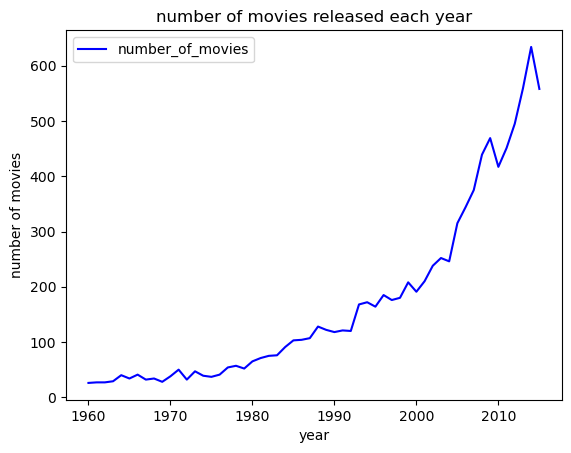

In [173]:
df_1.plot(x='year',y='number_of_movies',kind='line',color='b')
plt.xlabel('year')
plt.ylabel('number of movies')
plt.title('number of movies released each year');

> We can notice the positive relation between the number of movies released each year

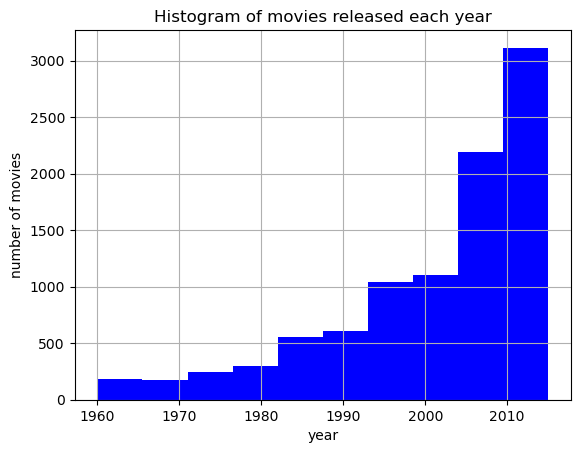

In [174]:
df.release_year.hist(color='b')
plt.xlabel('year')
plt.ylabel('number of movies')
plt.title('Histogram of movies released each year');

> the above Histogram figure confirms also the positive relation as it is skewed to the left

### 2. Show the profit over all years?

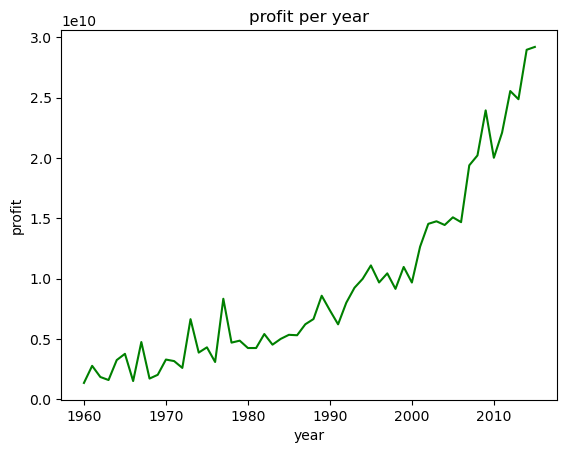

In [175]:
df_2=df.groupby('release_year').profit.sum().plot(kind='line',color='g')
plt.xlabel('year')
plt.ylabel('profit')
plt.title('profit per year');

> we can notice from the above graph the positive relation also between the profit and years in general
>
> Also for the last year, although it doesn't have the highest number of movies released, it has the highest profit

### 3. Show the relation betwwen profit and vote

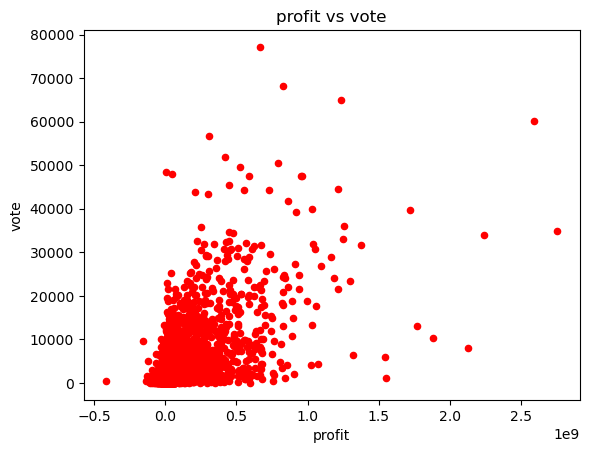

In [176]:
df.plot(x='profit',y='vote',kind='scatter',color='r')
plt.title('profit vs vote');

> we can notice from the above graph the positive relation between profit and vote but it is not the same criteria for all movies, as we have also more movies with high profit but less vote

#### we will make a function to use in most of the plots of interest

In [177]:
def myplot(df,main_var,y_var,stat='sum',top=20,color='steelblue',plot_type='barh'):
    df.groupby([main_var])[y_var].agg(stat).nlargest(top).plot(kind=plot_type,color=color)
    main_var=main_var.replace('_'," ")
    y_var=y_var.replace('_'," ")
    plt.title('top {} {} by {} of {}'.format(top,main_var,stat,y_var))
    plt.ylabel(main_var.title())
    plt.xlabel(y_var.title())

### 4. What is the top twenty movies that have the highest vote?

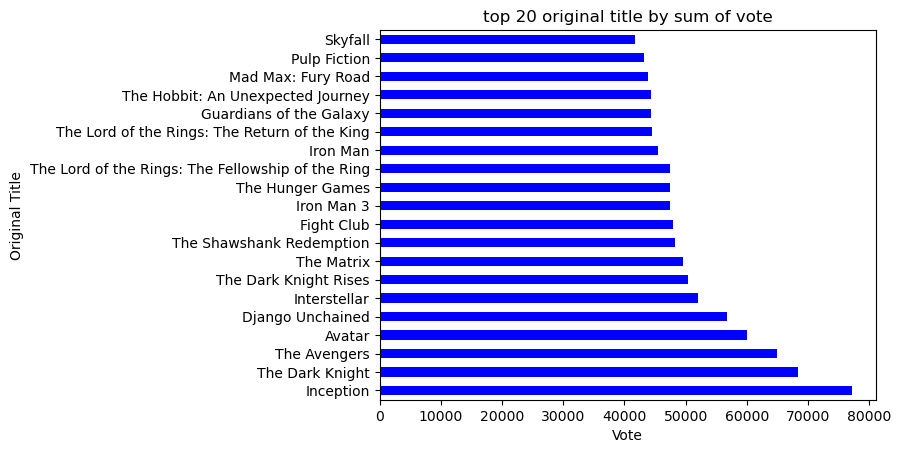

In [178]:
myplot(df,'original_title','vote',color='b')

### 5. What is the top twenty movies that have the highest profit?

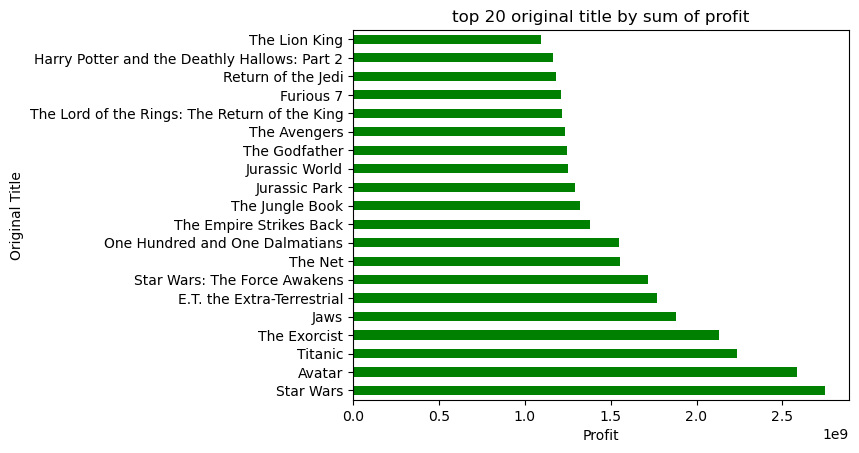

In [179]:
myplot(df,'original_title','profit',color='g')

#### we will make comparison to see the vote for the movies with the highest profit to make the comparison consistent
>
> so we will get the index of the movies with the highest profit first

In [180]:
ind=df.groupby('original_title').profit.sum().nlargest(20).index #get the index of the movies with the highest profit

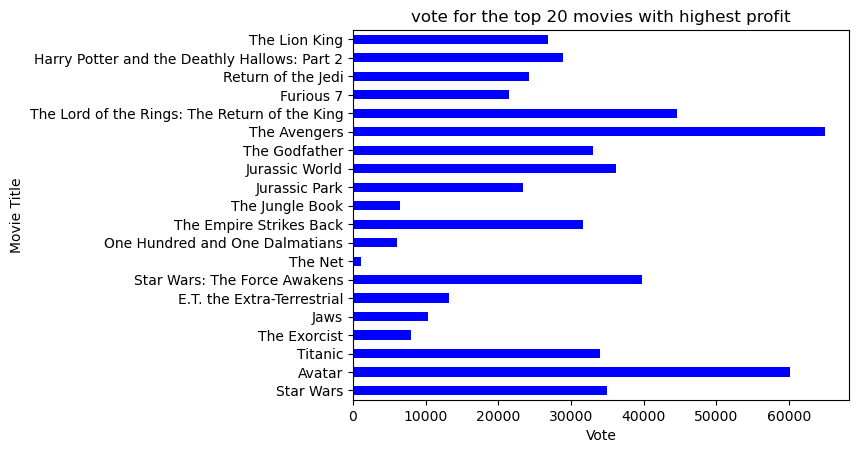

In [181]:
df.groupby('original_title').vote.sum()[ind].plot(kind='barh',color='b')
plt.xlabel('Vote')
plt.ylabel('Movie Title')
plt.title('vote for the top 20 movies with highest profit');#over all years

> we can notice from the above figure that it not neccessary for the movie to have a higher vote to achieve more profit


### 6. What is the top twenty production_companies that have the highest profit?

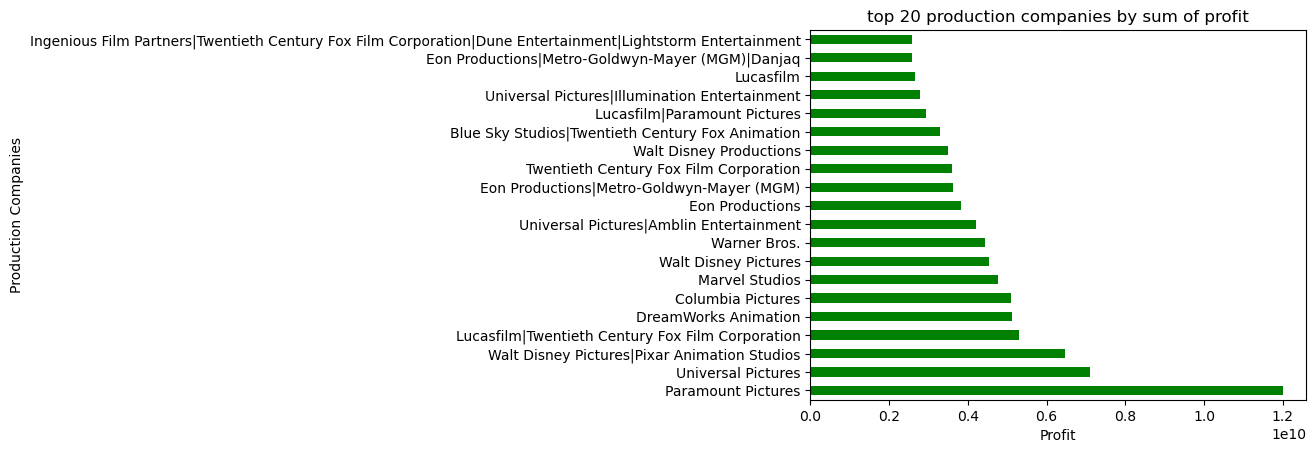

In [182]:
myplot(df,'production_companies','profit',color='g')

### 7. make a comparison for directors to show number of movies released and total profit gained *(top twenty only)*

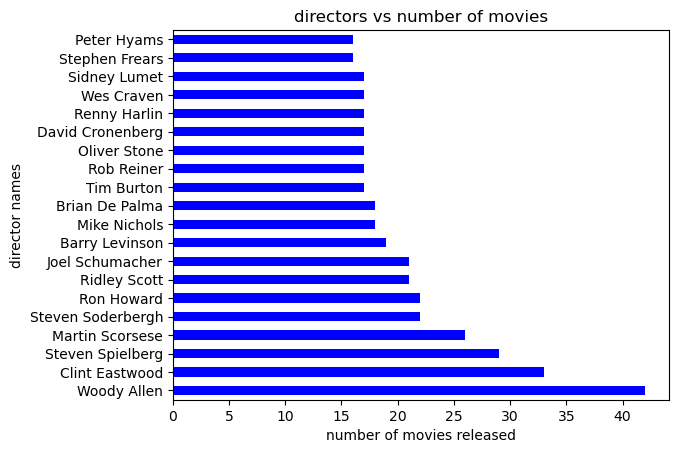

In [183]:
df.director.value_counts().head(20).plot(kind='barh',color='b')
plt.xlabel('number of movies released')
plt.ylabel('director names')
plt.title('directors vs number of movies');

In [184]:
ind_1=df.director.value_counts().index #get the index names for the above figure to make the index consistent to be able to compare

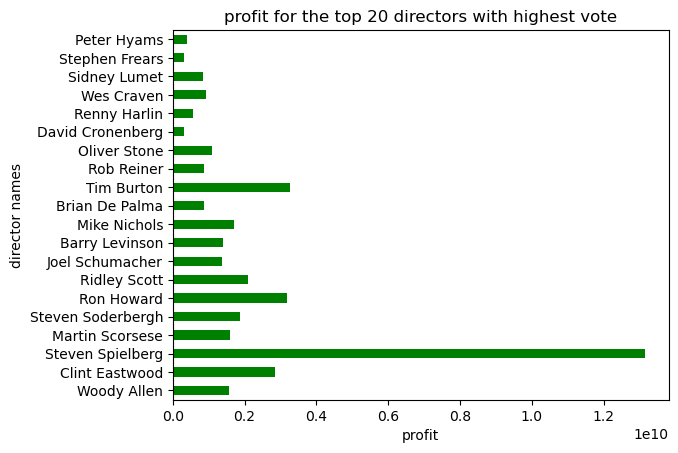

In [185]:
df.groupby('director').profit.sum()[ind_1].head(20).plot(kind='barh',color='g')
plt.xlabel('profit')
plt.ylabel('director names')
plt.title('profit for the top 20 directors with highest vote');

> from the above comparison, we can see that directors don't need to release more movies to get high profits, as there are directors have less moves than others but they gained more profit

<a id='conclusions'></a>
## Conclusions

> the positive relation between the number of movies released each year and a  Histogram figure confirms also the positive relation as it is skewed to the left
> 
> the positive relation also between the profit and years in general
>
>for any year, it doesn't mean that it has the highest profit when it has a lot of movies released, such as the last year, as it has the highest profit but different year which has the highest number of movies released.
> 
> the positive relation between profit and vote but it is not the same criteria for all movies, as we have also more movies with high profit but less vote
>
> it is not neccessary for the movie to have a higher vote to achieve more profit
>
> directors don't need to release more movies to get high profits, as there are directors have less moves than others but they gained more profit
>
> we made an assumption for the movies which don't have a record for the revenue or budget and replaced its zero values with mean of the values exist.
>
> we considered only the top 20 of every variable such as director names, movie titles, and production companies.